In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [42]:
data = pd.read_csv('data/cervical_cancer_data.csv')

In [43]:
data.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

In [44]:
data.replace('?',np.nan, inplace = True)

In [45]:
data_y = data[['Hinselmann', 'Schiller',
       'Citology', 'Biopsy']]
data_x = data.iloc[:,:-4]

# CLASS DISTRIBUTIONS

There are only 6 patients that had a positive test result for all 4 diagnostic test out of 858 patients

In [46]:
class_dist = pd.DataFrame(columns = ['Test','cancer','healthy'])
class_dist['Test'] = data_y.columns.to_list()
class_dist['cancer'] = [np.count_nonzero(data_y[col]) for col in data_y.columns]
class_dist['healthy'] = data.shape[0] - class_dist['cancer'] 

class_dist = pd.melt(class_dist, id_vars = ['Test'], var_name = 'Diagnosis', value_name = 'Count')

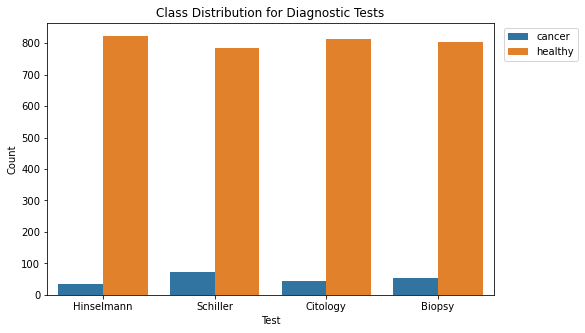

In [47]:
plt.figure(figsize = (8,5))
ax = sns.barplot(x = 'Test', y = 'Count', hue = 'Diagnosis', data = class_dist)
plt.legend(bbox_to_anchor=(1.2, 1), loc = 1)
plt.title('Class Distribution for Diagnostic Tests')
# plt.savefig('figures/class-distribution-all-tests.png', bbox_inches = 'tight')
plt.show()

# MISSING VALUE ANALYSIS

There are huge number of missing values in STD: Time since firt and last diagnosis so it makes sense to drop these features. Moreover, there is a clear pattern where there is no information about contraceptives, IUD and any type of STDs. This is probably because the patients were not comfortable disclosing this information. Further analysis is done in later sections to determine which imputation technique will work the best.

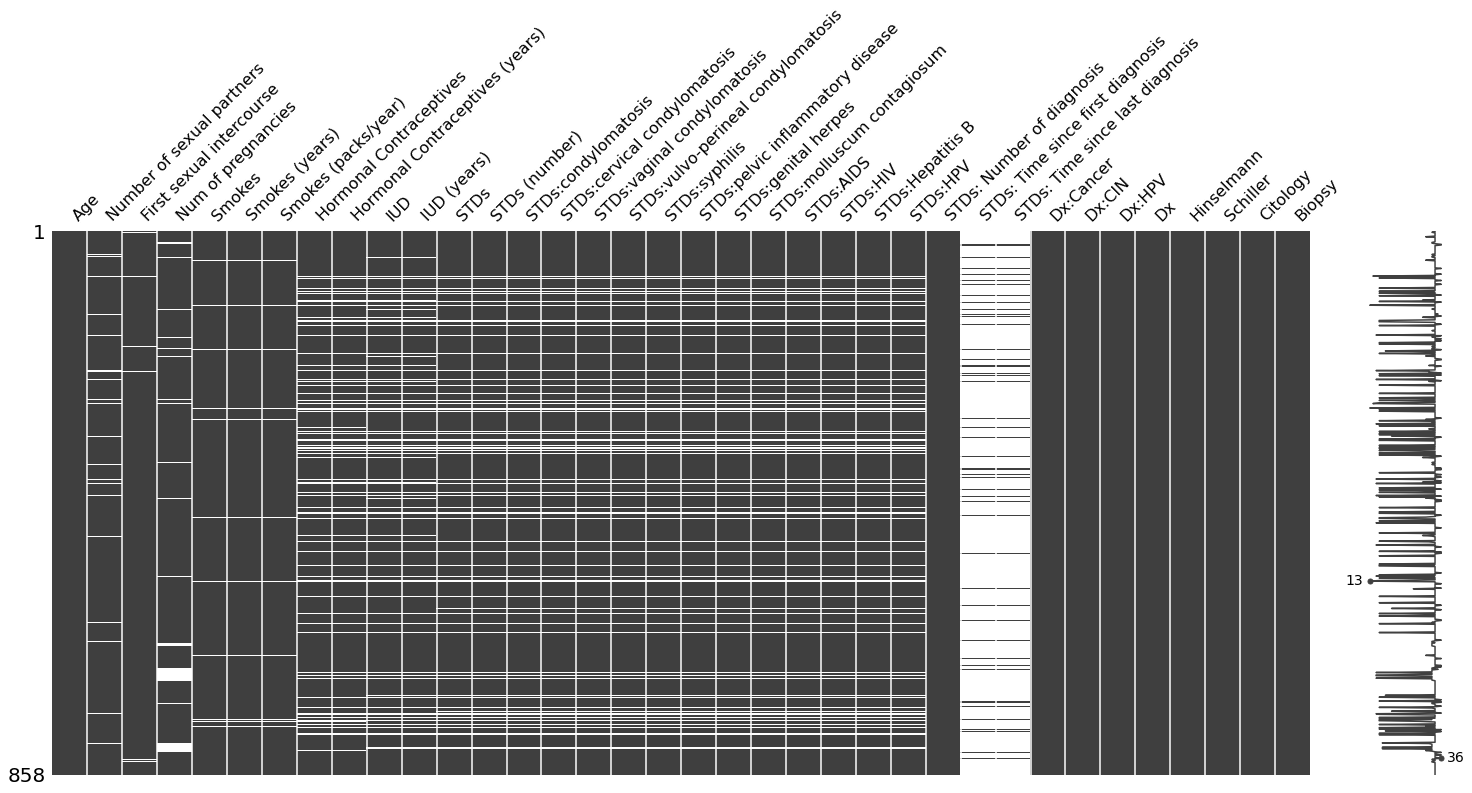

In [48]:
msno.matrix(data)
# plt.savefig('figures/missing-values-plot.png', bbox_inches = 'tight')
plt.show()

In [49]:
data.drop(columns = ['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis'], inplace = True)

In [50]:
missing_df = (100*data.isnull().sum()/858).to_frame()
missing_df.columns = ['percentage missing']
missing_df.sort_values(by = 'percentage missing')

,percentage missing
Age,0.000000
Schiller,0.000000
Hinselmann,0.000000
Dx,0.000000
Dx:HPV,0.000000
Dx:CIN,0.000000
Dx:Cancer,0.000000
STDs: Number of diagnosis,0.000000
Citology,0.000000
Biopsy,0.000000


# FEATURE ANALYSIS

In [51]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = data.select_dtypes(include=numerics)
numerical_columns = list(newdf.columns)

non_numeric = []
for c in list(data.columns):
    if c not in numerical_columns:
        non_numeric.append(c)

print('Numerical features = \n{}'.format(numerical_columns))
print('\nCategorical features = \n{}'.format(non_numeric))

Numerical features = 
['Age', 'STDs: Number of diagnosis', 'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology', 'Biopsy']

Categorical features = 
['Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD', 'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis', 'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis', 'STDs:pelvic inflammatory disease', 'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV']


## Numerical Features

### Converting appropriate categories to numerical

Above we can see that a few of the supposedly non-numerical categories are actually numerical; they just have been put in the dataset as strings. These categories are Number of sexual partners, First sexual intercourse, Num of pregnancies, STDs: Time since first diagnosis, STDs: Time since last diagnosis. We converted these to numeric values.

In [52]:
data['Number of sexual partners'] = pd.to_numeric(data['Number of sexual partners'], errors='coerce')
data['First sexual intercourse'] = pd.to_numeric(data['First sexual intercourse'], errors='coerce')
data['Num of pregnancies'] = pd.to_numeric(data['Num of pregnancies'], errors='coerce')
data['Smokes (years)'] = pd.to_numeric(data['Smokes (years)'], errors='coerce')
data['Hormonal Contraceptives (years)'] = pd.to_numeric(data['Hormonal Contraceptives (years)'], errors='coerce')
data['IUD (years)'] = pd.to_numeric(data['IUD (years)'], errors='coerce')
data['STDs (number)'] = pd.to_numeric(data['STDs (number)'], errors='coerce')

In [53]:
numerical_cols = ['Age', \
                  'STDs: Number of diagnosis',\
                  'Number of sexual partners', \
                  'First sexual intercourse', \
                  'Num of pregnancies',\
                  'Smokes (years)', \
                  'Smokes (packs/year)',\
                  'Hormonal Contraceptives (years)',\
                  'IUD (years)']

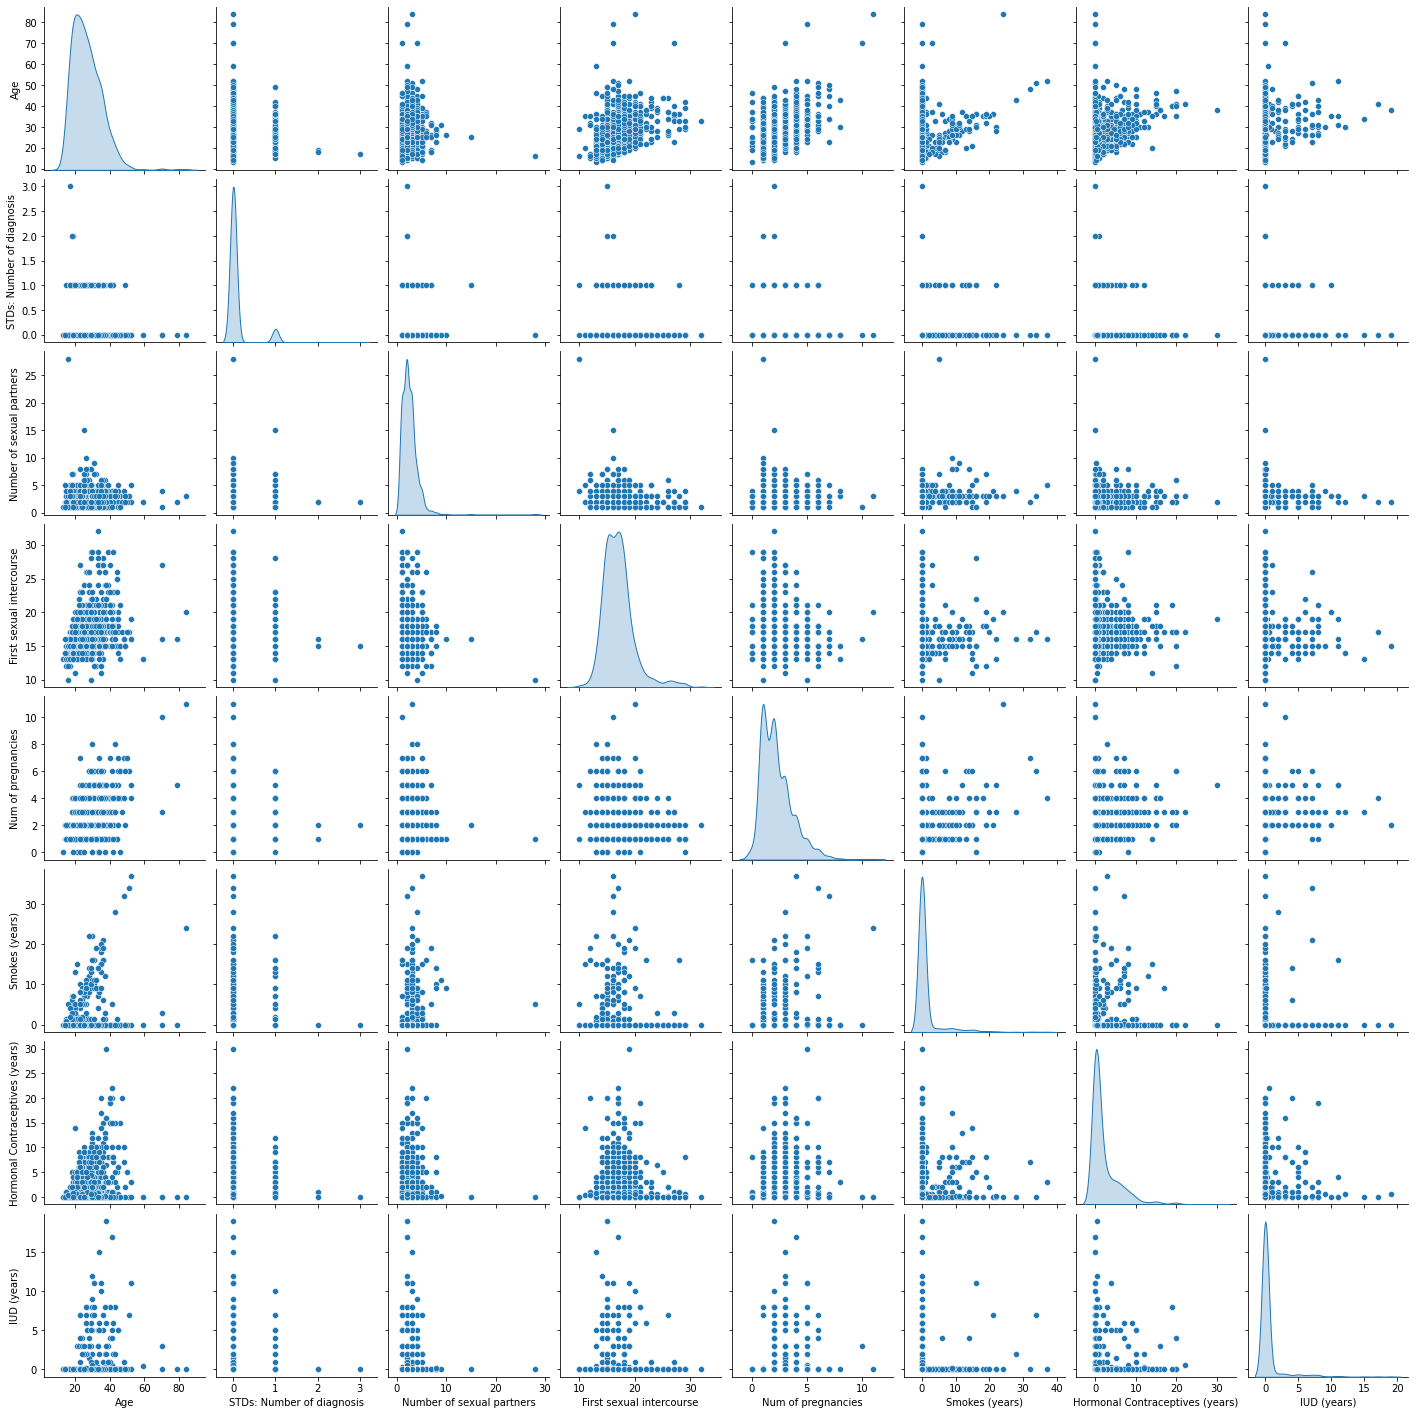

In [58]:
sns.pairplot(data[numerical_cols], diag_kind = 'kde')
plt.show()

## Categorical Features

### Analyzing relationships between STDs, Age and Number of Sexual Partners for Imputation

In [55]:
std_df = data[['Age','Number of sexual partners']+[x for x in data.columns if 'STDs:' in x]]
std_df = std_df.sort_values(by = 'Number of sexual partners')

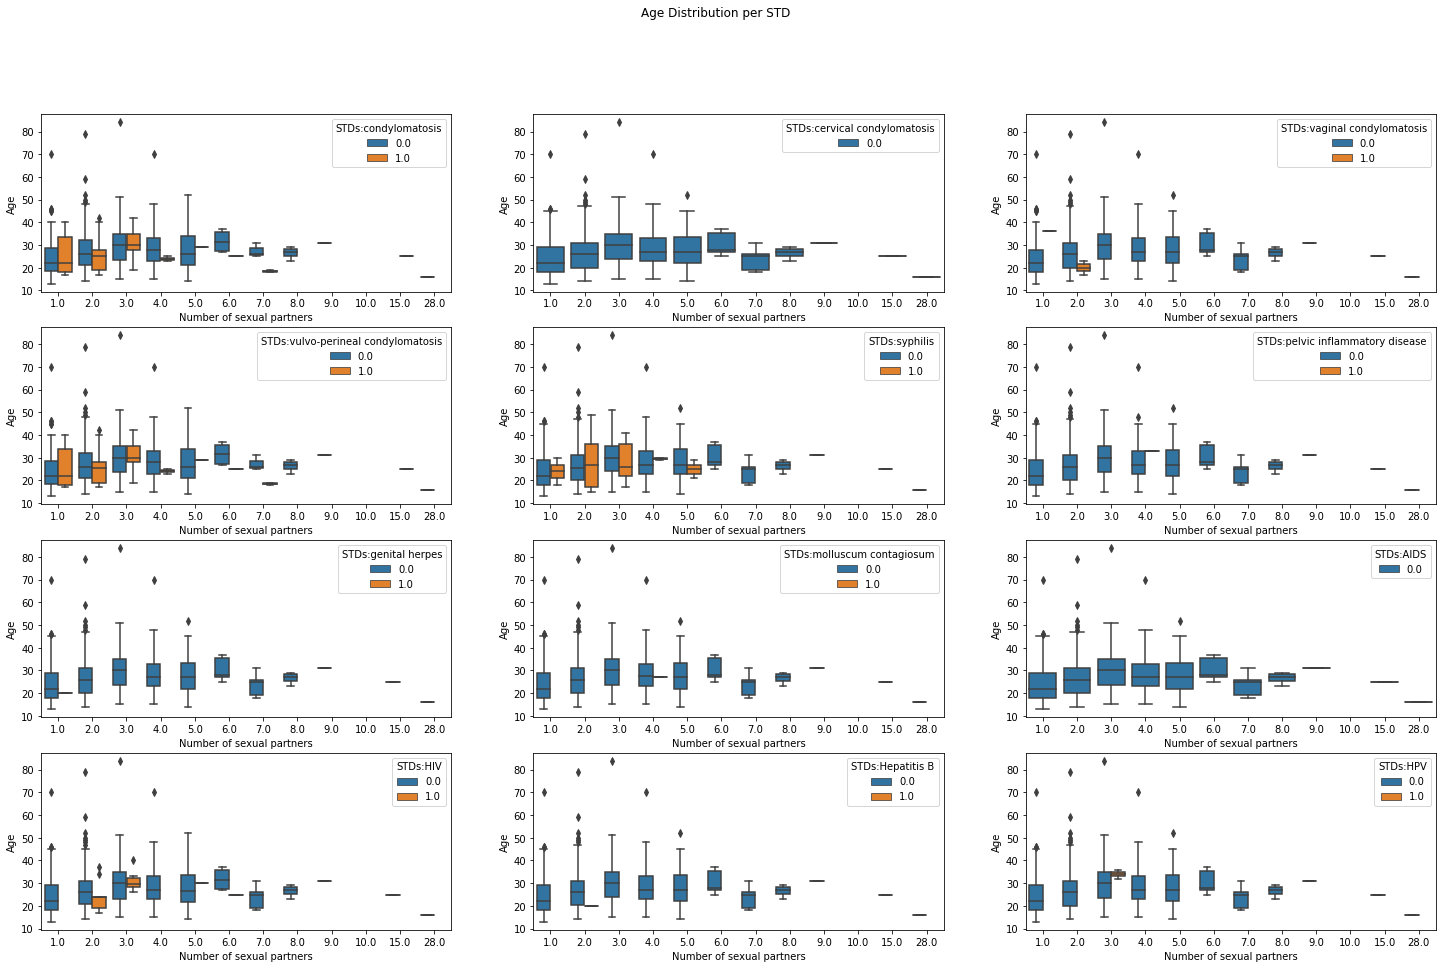

In [57]:
fig, axes = plt.subplots(4, 3, figsize=(25, 15), sharey=False)
fig.suptitle('Age Distribution per STD')

for i in range(3):
    sns.boxplot(ax = axes[0][i],y = 'Age', x = 'Number of sexual partners', hue = std_df.iloc[:,i+2], \
            data = std_df)

for i in range(3):
    sns.boxplot(ax = axes[1][i],y = 'Age', x = 'Number of sexual partners', hue = std_df.iloc[:,i+5], \
            data = std_df)
    
for i in range(3):
    sns.boxplot(ax = axes[2][i],y = 'Age', x = 'Number of sexual partners', hue = std_df.iloc[:,i+8], \
            data = std_df)
    
for i in range(3):
    sns.boxplot(ax = axes[3][i],y = 'Age', x = 'Number of sexual partners', hue = std_df.iloc[:,i+11], \
            data = std_df)

plt.savefig('figures/Age-distribution-per-STD.png', bbox_inches = 'tight')
plt.show()

### Focus on HPV infection and cancer incidence

In [ ]:
std_hpv = data[['STDs:HPV']+data_y.columns.to_list()].copy()
std_hpv.dropna(inplace = True)
std_hpv['STDs:HPV'] = pd.to_numeric(std_hpv['STDs:HPV'], errors='coerce')

std_hpv_biopsy = std_hpv[['STDs:HPV','Biopsy']].groupby(['STDs:HPV','Biopsy']).size().reset_index(name = 'Count')
std_hpv_hinselmann = std_hpv[['STDs:HPV','Hinselmann']].groupby(['STDs:HPV','Hinselmann']).size().reset_index(\
                                                                                        name = 'Count')
std_hpv_schiller = std_hpv[['STDs:HPV','Schiller']].groupby(['STDs:HPV','Schiller']).size().reset_index(\
                                                                                            name = 'Count')
std_hpv_citology = std_hpv[['STDs:HPV','Citology']].groupby(['STDs:HPV','Citology']).size().reset_index(\
                                                                                                name = 'Count')

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharey=False)
fig.suptitle('HPV Infection and Cancer Incidence')

sns.barplot(ax = axes[0][0], x = 'Biopsy', y = 'Count', hue = 'STDs:HPV', data = std_hpv_biopsy)
sns.barplot(ax = axes[0][1], x = 'Hinselmann', y = 'Count', hue = 'STDs:HPV', data = std_hpv_hinselmann)
sns.barplot(ax = axes[1][0], x = 'Schiller', y = 'Count', hue = 'STDs:HPV', data = std_hpv_schiller)
sns.barplot(ax = axes[1][1], x = 'Citology', y = 'Count', hue = 'STDs:HPV', data = std_hpv_citology)

plt.savefig('figures/HPV-infection-cancer-incidence.png', bbox_inches = 'tight')
plt.show()